## Table of Contents:
#### 01. Importing libraries and data and renaming columns
#### 02. The Elbow Technique
#### 03. K-Means Clustering

## 01. Importing libraries and data and renaming columns

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# defining the path

path=r'/Users/sanju/Documents/Apartment Rental Analysis in Berlin '

In [4]:
# importing the data

df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','immo_data_berlin_cleaned2.csv'),index_col=0)

In [5]:
df.head()

,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,...,street,lift,typeOfFlat,noRooms,floor,garden,city,locality_district,Rent category,district
0,Berlin,320.00,central_heating,ONE_YEAR_FREE,False,True,32.288282,1140.00,1965.513365,district_heating,...,Metropolitan_Park,True,ground_floor,3.0,0.0,False,Berlin,Staaken_Spandau,Medium rent,Spandau
1,Berlin,79.00,central_heating,ONE_YEAR_FREE,False,False,40.000000,955.00,1918.000000,gas,...,Börnestraße,False,ground_floor,2.0,0.0,False,Berlin,Weißensee_Weißensee,Medium rent,Pankow
2,Berlin,150.00,floor_heating,ONE_YEAR_FREE,True,True,40.000000,1300.00,2019.000000,district_heating,...,Stallschreiberstraße,True,apartment,2.0,3.0,False,Berlin,Mitte_Mitte,Medium rent,Mitte
3,Berlin,228.78,floor_heating,ONE_YEAR_FREE,False,True,32.288282,1428.78,2017.000000,district_heating,...,Hallesche_Straße,True,apartment,2.5,6.0,False,Berlin,Kreuzberg_Kreuzberg,Medium rent,Friedrichshain-Kreuzberg
4,Berlin,147.08,district_heating,ONE_YEAR_FREE,True,True,40.000000,1559.05,2019.000000,district_heating,...,Heidestraße,True,ground_floor,2.0,0.0,False,Berlin,Tiergarten_Tiergarten,Medium rent,Mitte


In [6]:
df.shape

(8959, 25)

In [7]:
df.dtypes

state                  object
serviceCharge         float64
heatingType            object
telekomTvOffer         object
newlyConst               bool
balcony                  bool
telekomUploadSpeed    float64
totalRent             float64
yearConstructed       float64
firingTypes            object
hasKitchen               bool
cellar                   bool
baseRent              float64
livingSpace           float64
condition              object
street                 object
lift                     bool
typeOfFlat             object
noRooms               float64
floor                 float64
garden                   bool
city                   object
locality_district      object
Rent category          object
district               object
dtype: object

In [8]:
# creating a subset by removing the categorical and boolean columns

df_continous=df[['serviceCharge','telekomUploadSpeed','totalRent','yearConstructed','baseRent','livingSpace','noRooms','floor']]

In [9]:
df_continous.head()

,serviceCharge,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor
0,320.00,32.288282,1140.00,1965.513365,820.00,77.00,3.0,0.0
1,79.00,40.000000,955.00,1918.000000,808.00,62.63,2.0,0.0
2,150.00,40.000000,1300.00,2019.000000,1150.00,46.40,2.0,3.0
3,228.78,32.288282,1428.78,2017.000000,1200.00,67.00,2.5,6.0
4,147.08,40.000000,1559.05,2019.000000,1338.43,73.54,2.0,0.0


## 02. The Elbow Technique

In [10]:
# Defining the range of potential clusters in the data.

num_cl = range(1, 10) 

# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
# Creating a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_continous).score(df_continous) for i in range(len(kmeans))] 

score

/Users/sanju/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sanju/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sanju/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sanju/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sanju/anacond

[-5655095933.792122,
 -1829019771.128825,
 -924520404.5365403,
 -597028866.2161801,
 -423779565.64737177,
 -327163926.6161933,
 -270795734.33972746,
 -232302898.80440885,
 -199036313.42669955]

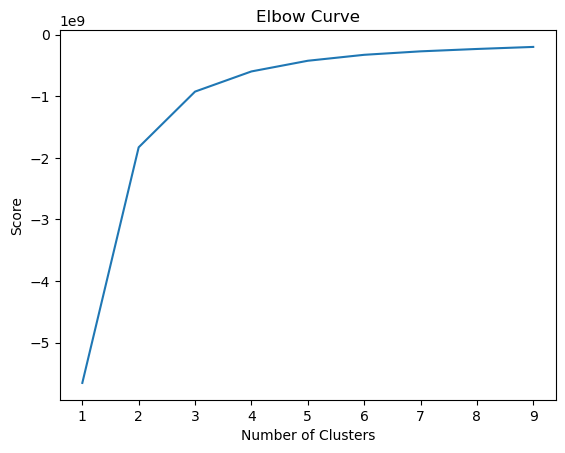

In [12]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Here we can see that there is a large jump from 2 to 3 and a small jump from 3 to 4 on the x-axis, but after that the curve straightens out. This means that the optimal count of the clusters should be 4.

## 03. K-Means Clustering

In [13]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [14]:
# Fitting the k-means object to the data.

kmeans.fit(df_continous)

/Users/sanju/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [15]:
df_continous['clusters'] = kmeans.fit_predict(df_continous)

/Users/sanju/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/ss/mvg6mpls2xs7mgfvn6l_why00000gn/T/ipykernel_53471/2130137312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continous['clusters'] = kmeans.fit_predict(df_continous)


In [16]:
df_continous.head()

,serviceCharge,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor,clusters
0,320.00,32.288282,1140.00,1965.513365,820.00,77.00,3.0,0.0,0
1,79.00,40.000000,955.00,1918.000000,808.00,62.63,2.0,0.0,0
2,150.00,40.000000,1300.00,2019.000000,1150.00,46.40,2.0,3.0,0
3,228.78,32.288282,1428.78,2017.000000,1200.00,67.00,2.5,6.0,0
4,147.08,40.000000,1559.05,2019.000000,1338.43,73.54,2.0,0.0,3


In [24]:
# exporting this dataframe with clusters

df_continous.to_csv(os.path.join(path,'02 Data','Prepared Data','immo_berlin_clusters.csv'))

In [17]:
df_continous['clusters'].value_counts()

2    3701
0    2699
3    1789
1     770
Name: clusters, dtype: int64

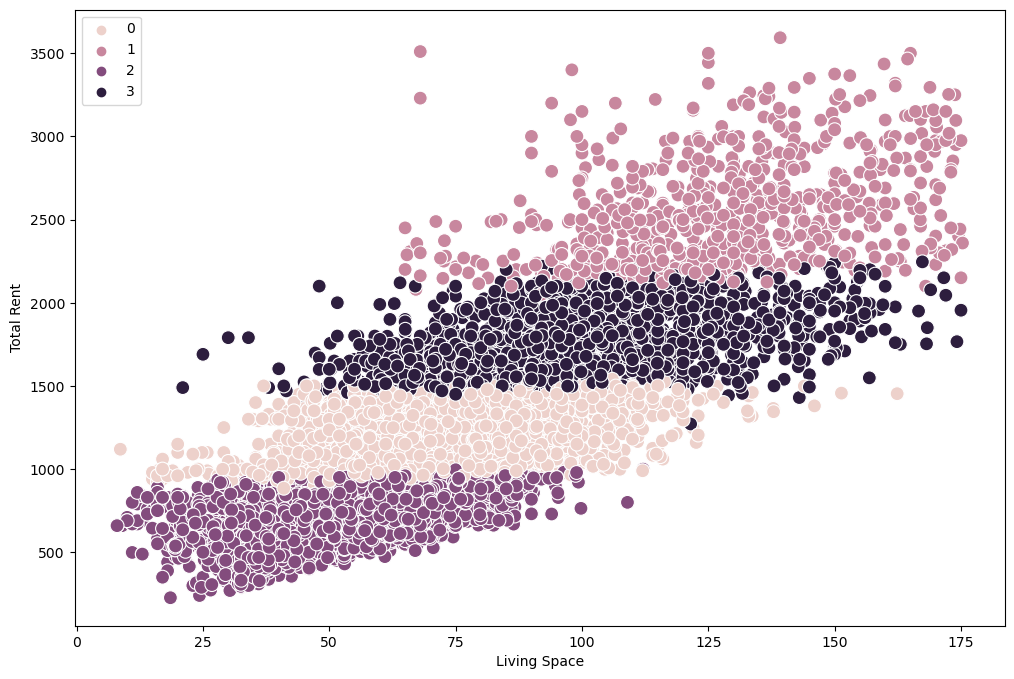

In [18]:
# Plotting the clusters for the "totalRent" and "livingSpace" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_continous['livingSpace'], y=df_continous['totalRent'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Living Space') 
plt.ylabel('Total Rent') 
plt.show()

Here we can see that all the data points are grouped into 4 clusters. The first cluster(coded 0) has living space within 100m2 and has the lowest total rent. The second cluster (coded 3) has more living space and the total rent also increases. The third cluster (coded 2) seems to be the most densely populated cluster with living space going from 50m2 till 150m2 (there are also few rentals having living space till 175m2) and the total rent has also increased from 1500€ to 2000€. The fourth cluster (coded 1) has the highest rent and most of the living space ranges from 100m2 to 175m2.

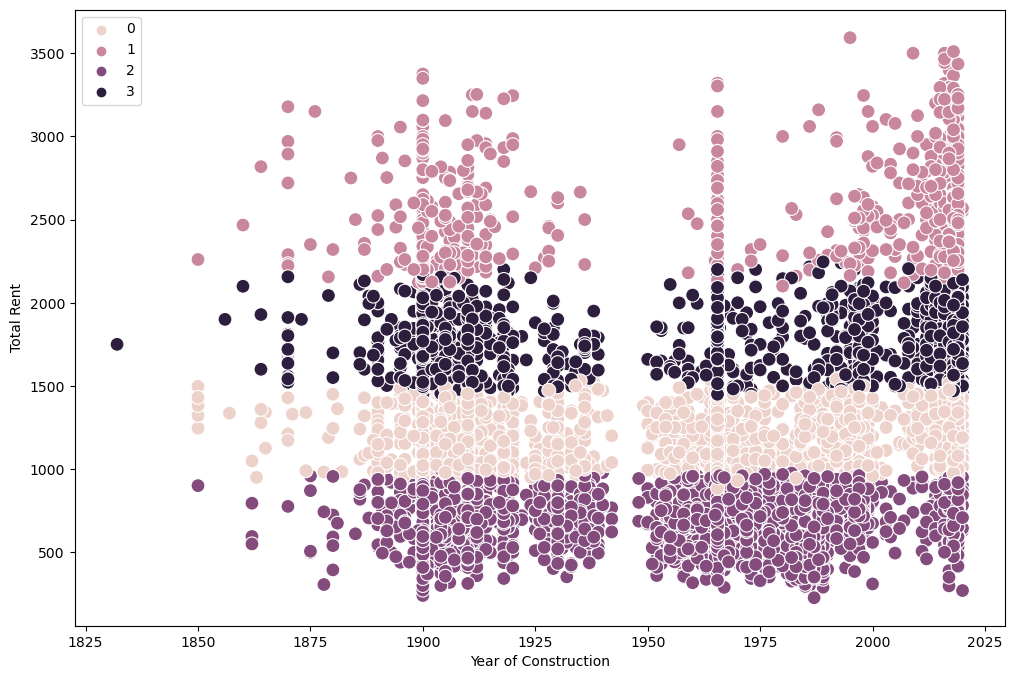

In [19]:
# Plot the clusters for the "yearConstructed" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_continous['yearConstructed'], y=df_continous['totalRent'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year of Construction') 
plt.ylabel('Total Rent') 
plt.show()

From the above chart we can see that there are very few rentals which were constructed before 1880. If we consider only the very high rents which are above 2000€ (cluster code 1), we can see that the rentals constructed between 1900 and 1920 have very high rents and the newly constructed rentals which are constructed after 2013 approximately have very high rents.

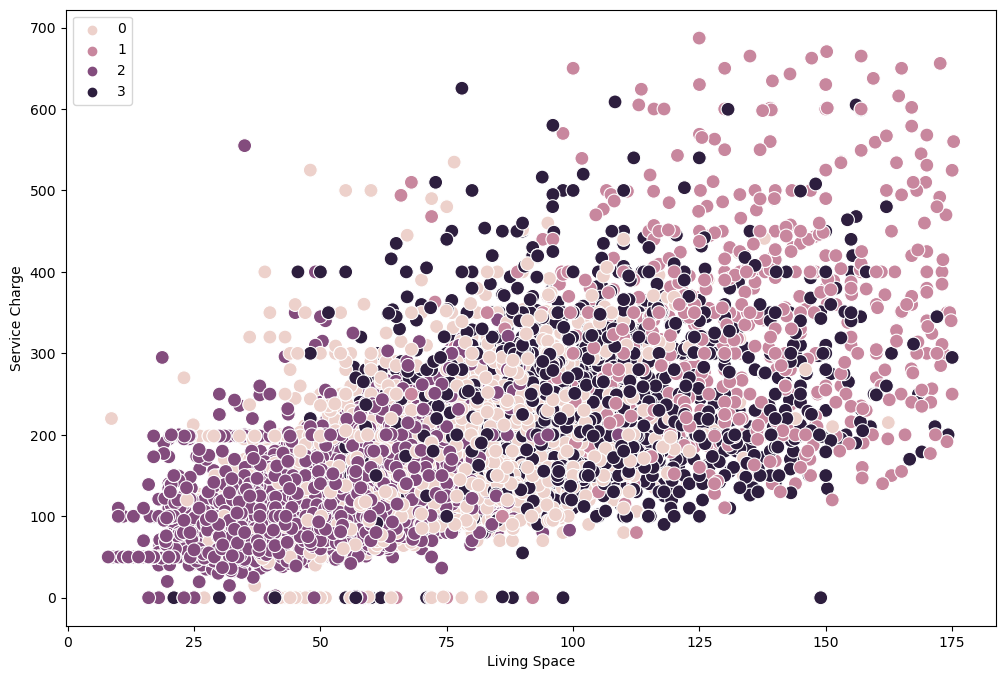

In [20]:
# Plotting the clusters for the "serviceCharge" and "livingSpace" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_continous['livingSpace'], y=df_continous['serviceCharge'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Living Space') 
plt.ylabel('Service Charge') 
plt.show()

In [21]:
# creating a new column 'cluster' for executing the 'groupby' function

df_continous.loc[df_continous['clusters'] == 3, 'cluster'] = 'dark purple'
df_continous.loc[df_continous['clusters'] == 2, 'cluster'] = 'purple'
df_continous.loc[df_continous['clusters'] == 1, 'cluster'] = 'pink'
df_continous.loc[df_continous['clusters'] == 0, 'cluster'] = 'light pink'

/var/folders/ss/mvg6mpls2xs7mgfvn6l_why00000gn/T/ipykernel_53471/2447558331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continous.loc[df_continous['clusters'] == 3, 'cluster'] = 'dark purple'


In [22]:
df_continous.head()

,serviceCharge,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor,clusters,cluster
0,320.00,32.288282,1140.00,1965.513365,820.00,77.00,3.0,0.0,0,light pink
1,79.00,40.000000,955.00,1918.000000,808.00,62.63,2.0,0.0,0,light pink
2,150.00,40.000000,1300.00,2019.000000,1150.00,46.40,2.0,3.0,0,light pink
3,228.78,32.288282,1428.78,2017.000000,1200.00,67.00,2.5,6.0,0,light pink
4,147.08,40.000000,1559.05,2019.000000,1338.43,73.54,2.0,0.0,3,dark purple


In [23]:
# calculating a descriptive statistics of all the clusters

df_continous.groupby('cluster').agg({'serviceCharge':['mean', 'median'], 
                         'telekomUploadSpeed':['mean', 'median'], 
                         'totalRent':['mean', 'median'],
                          'yearConstructed':['mean', 'median'],
                          'baseRent':['mean', 'median'],
                          'livingSpace':['mean', 'median'],
                          'noRooms':['mean', 'median'],
                          'floor':['mean', 'median']})

serviceCharge         telekomUploadSpeed           totalRent  \
                     mean  median               mean median         mean   
cluster                                                                    
dark purple    230.691827  215.72          31.834618   40.0  1762.316400   
light pink     172.239484  161.00          32.215281   40.0  1196.898585   
pink           326.307007  320.00          31.140764   40.0  2554.681013   
purple         128.701508  120.00          33.052855   40.0   719.616587   

                     yearConstructed                  baseRent            \
              median            mean       median         mean    median   
cluster                                                                    
dark purple  1750.00     1971.498686  1983.000000  1491.067736  1489.000   
light pink   1195.00     1963.748742  1965.513365   991.561997   987.000   
pink         2499.00     1973.097284  2000.000000  2180.816649  2136.125   
purple        732.37     1962.085421  1965.513365   566.778025   573.000   

            livingSpace            noRooms            floor            
                   mean   median      mean median      mean    median  
cluster                                                                
dark purple   98.432068   96.000  3.065120    3.0  2.891334  2.851691  
light pink    73.296903   73.000  2.444868    2.0  2.475384  2.851691  
pink         127.546636  126.885  3.583766    4.0  3.297000  3.000000  
purple        53.312945   54.870  1.857228    2.0  2.601255  2.851691

From the above descriptive statistics we can see that the pink colored cluster (coded 1) has the highest service charge, highest total rent, highest base rent, largest living space, the maximum number of rooms on an average and are also on the top floors. On a contrary, its telekom upload speed is the lowest and its mean construction year is 1973. This totally makes sense that the biggest living space and the maximum number of rooms has the highest base rent, service charge and the total rent.